In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [67]:
input_path = "./Exercise 6.1/"
output_path = "./"

In [72]:
def kmeans(img, k, num_channels=1):
    # Chage shape to array by channel (in this case, only one channel)
    flat_channel = img.reshape((-1,num_channels))
    flat_channel = np.float32(flat_channel)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 3)
    ret,label,center=cv2.kmeans(flat_channel,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # ---->>>> REVISAR PARAMS, no fuchiqué nada

    # Convert to uint8 and create image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title("Input")
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(res2, cmap='gray')
    plt.title("Clustered")
    plt.axis('off')
    plt.show()

In [83]:
def mean_shift(img, quantile, num_channels=1):
    # Reshape image to flatten channel
    flat_channel = img.reshape((-1,num_channels))

    # Compute clustering with MeanShift
    bandwidth = estimate_bandwidth(flat_channel, quantile=quantile) # n_samples=500
    ms = MeanShift(bandwidth=bandwidth) # bin_seeding=True -> pa que se usa, falla con ella
    ms.fit(flat_channel)

    # Get the labels
    labels = ms.labels_
    print(f" Number of clusters: {len(np.unique(labels))}")

    # Create result image
    res2 = np.reshape(labels, img.shape[:2])

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title("Input")
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(res2, cmap='gray')
    plt.title("Clustered")
    plt.axis('off')
    plt.show()

# 1. Clustering

## Given the BW image in Fig 1:

 i) Apply the K-means method to segment the 2 main structures: object and background.

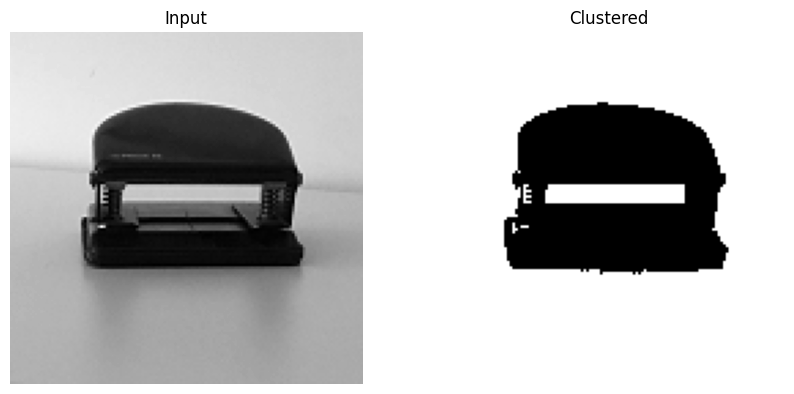

In [69]:
# Load image
img = cv2.imread(input_path + 'figura_1_BW.png', cv2.IMREAD_GRAYSCALE)

# Apply kmeans
kmeans(img, 2, num_channels=1)

ii) Apply the Mean Shift method to segment the 2 main structures: object and background.

 Number of clusters: 2


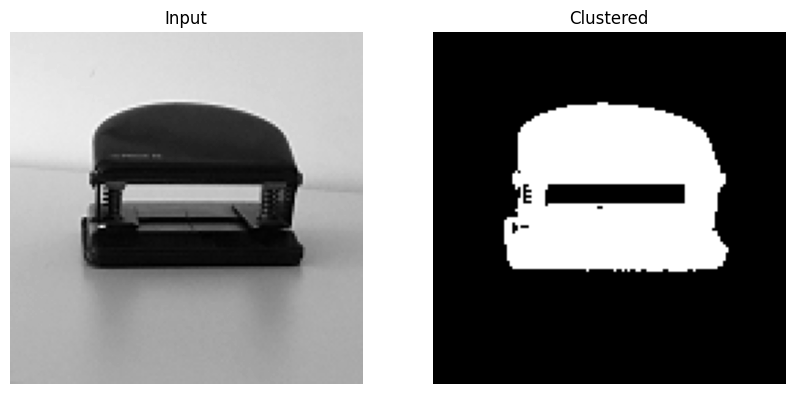

In [84]:
# Load image
img = cv2.imread(input_path + 'figura_1_BW.png', cv2.IMREAD_GRAYSCALE)

# Apply mean shift
mean_shift(img, 0.3, num_channels=1)



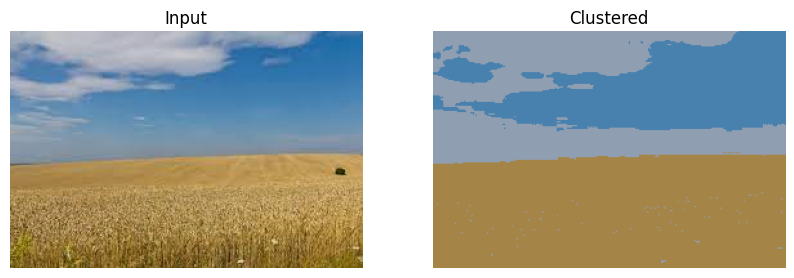

In [74]:
# Load image
img_wheat = cv2.imread(input_path + 'fieldWheat.png', cv2.IMREAD_COLOR)

# Convert to RGB
img_wheat = cv2.cvtColor(img_wheat, cv2.COLOR_BGR2RGB)

# Apply kmeans
kmeans(img_wheat, 3, num_channels=3)

 Number of clusters: 3


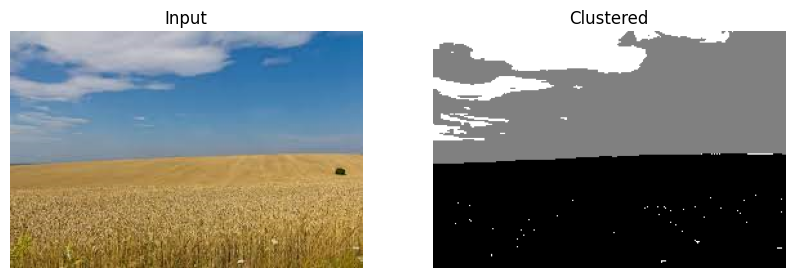

In [87]:
# Load image
img_wheat = cv2.imread(input_path + 'fieldWheat.png', cv2.IMREAD_COLOR)

# Convert to RGB
img_wheat = cv2.cvtColor(img_wheat, cv2.COLOR_BGR2RGB)

# Apply Mean Shift
mean_shift(img_wheat, 0.175, num_channels=3)